# Исследование рынка видеоигр

В нашем распоряжении данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. Нам нужно провести исследование для международного магазина видеоигр: на исторических данных выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Необходимо подготовить данные к анализу, выснять популярность жанров и платформ у пользователей, посмотреть на влияние оценки критиков и пользователей на продажи.
А так же проверить гипотезы.

### Шаг 1. Откройте файл с данными и изучите общую информацию:
- Путь к файлу: /datasets/games.csv.

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выхода
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 10)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn
from scipy import stats as st
from statistics import mean

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
display(games.head())
games.info()
games.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Шаг 2. Подготовьте данные:
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [4]:
# приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
# проверим количество дубликатов в датасете
games.duplicated().sum()

0

In [6]:
# пропуски в столбце name
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Считаю лучше их удалить**

In [7]:
games = games.dropna(subset = ['name'])
# проверим
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [8]:
# пропуски в столбце year_of_release
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Пропусков всего 1.61%, считаю их лучше удалить**

In [9]:
games = games.dropna(subset = ['year_of_release'])
# проверка
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [10]:
# пропуски в столбце rating
games[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**В большинстве, пропущены одновременно и рейтинг, оценка критиков и оценка пользователей. Удалять пропуски нельзя.**

Возможно из за того что игры новые, рейинг ещё не успел сформироваться для них, в случае старых игр думаю что на момет их выхода было сложно оценивать и сохранять их рейтинг.


In [11]:
# заменим пропуски на 'неизвестно'

In [12]:
games['rating'] = games['rating'].fillna('Unknown')
games['rating'].value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

**Заменим рейтинг RP (Rating Pending) на неизвестрно**

**Так же EC и K-A на Е**

**Рейтинг AO заменим на M, т.к. разница возраста у этих рейтингов составляет 1 год**

In [13]:
games.loc[games['rating'] == 'AO', 'rating'] = 'M'
games.loc[games['rating'] == 'RP', 'rating'] = 'Unknown'
games.loc[games['rating'].isin(['EC', 'K-A']), 'rating'] = 'E'

In [14]:
games['rating'].value_counts()

Unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

In [15]:
# пропуски в столбце critic_score
games[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown


**Пропусков очень много, удалять не будем**

In [16]:
# заменим пропуски на максимальное отрицательное значение 
games['critic_score'] = games['critic_score'].fillna(-100)
games['critic_score'] = games['critic_score'].astype('float')
games['critic_score'].describe()

count    16444.000000
mean       -17.959012
std         85.019035
min       -100.000000
25%       -100.000000
50%       -100.000000
75%         70.000000
max         98.000000
Name: critic_score, dtype: float64

In [17]:
# пропуски в столбце user_score
games[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-100.0,NaN,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-100.0,NaN,Unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-100.0,NaN,Unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-100.0,NaN,Unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-100.0,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-100.0,NaN,Unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-100.0,NaN,Unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-100.0,NaN,Unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-100.0,NaN,Unknown


In [18]:
display(games['user_score'].value_counts())
games[games['user_score'] == 'tbd']

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.5       2
1.3       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-100.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-100.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,-100.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,-100.0,tbd,E


In [19]:
len(games[games['user_score'] == 'tbd'])/len(games['user_score'])
# процент абривиатуры в user_score

0.14449039163220628

In [20]:
# абривиатура ничем не отличается от пропуска заменим их на обсольт отрицательного значения 
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].replace(np.NaN, -100)
# преобразуем данный столбец к целочисленному значению
games['user_score'] = games['user_score'].astype('float')
display(games['user_score'].value_counts())

-100.0    8981
 7.8       322
 8.0       285
 8.2       276
 8.3       252
          ... 
 0.7         2
 1.0         2
 0.2         2
 9.7         1
 0.0         1
Name: user_score, Length: 96, dtype: int64

In [21]:
# изменим тип данных столбца year_of_release
games['year_of_release'] = games['year_of_release'].astype('int')

In [22]:
# создадим столбец с сумарными продажами 
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [23]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-100.0,-100.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-100.0,-100.0,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-100.0,-100.0,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-100.0,-100.0,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-100.0,-100.0,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-100.0,-100.0,Unknown,0.01


In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Вывод:**

Данные в датасетах преобразованы для дальнейшего использования, были обработаны пропуски, некоторые строки были удалены, в некоторых пропуски были заменены на отрицательное значение, также были расчитаны суммарные продажи в отдельный столбец 'total_sales'

### Шаг 3. Проведите исследовательский анализ данных:
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    - Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:xlabel='year_of_release'>

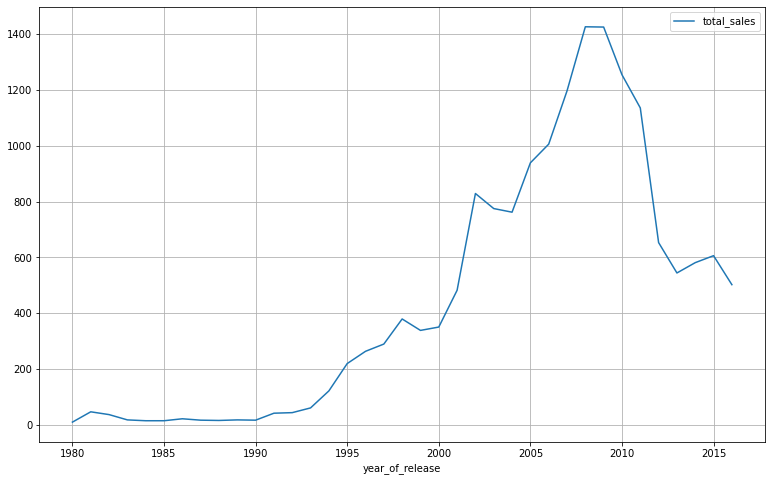

In [25]:
# сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
games.pivot_table(index='year_of_release', values='total_sales', aggfunc='count').plot(grid=True, figsize=(13, 8))

**Вывод:** 

По графику видно что в 2000 году было выпущенно в 2 больше игр чем 5 годами ранее, после чего рост продолжался вплоть до 2009 года после чего пошёл на спад. Следовательно, актуальными являются данными за прошедшие 15 лет, которые отражают как увелечение, так и падение количества игр.

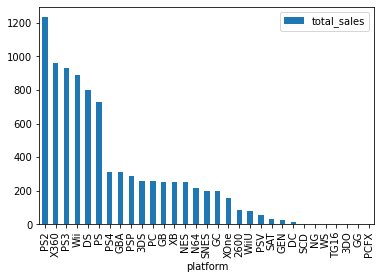

In [26]:
# как менялись продажи по платформам
# зависимость продаж по платформам
platform_sales = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).plot(kind='bar')

Из данного графика можно выделить несколько платформ с наибольшими суммарными продажами, например, PS2, X360, PS3, Wii, DS, PS. Данные 6 платформ выделяются от всех остальных наибольшими суммарными продажами.

<AxesSubplot:xlabel='year_of_release'>

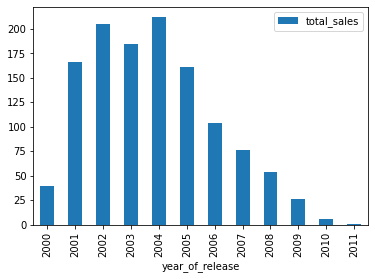

In [27]:
# платформы с наибольшими суммарными продажами и постройте распределение по годам
# PS2
games.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

На платформе PS2 пик продаж наблюдался в период с 2001 по 2005 год, затем следует спад, в 2011г. продажи прекратились, в настоящее время платформа не актуальна.

<AxesSubplot:xlabel='year_of_release'>

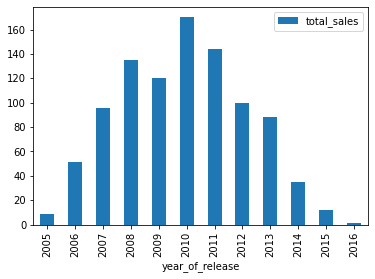

In [28]:
# X360
games.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

На платформе X360 пик продаж наблюдался в период с 2010 по 2011 год, затем следует спад. Даже учитывая, что за 2016г. неполные данные, можно сделать вывод, что в настоящее время платформа не актуальна.

<AxesSubplot:xlabel='year_of_release'>

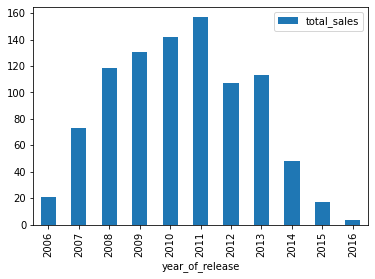

In [29]:
# PS3
games.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

На платформе PS3 пик продаж наблюдался в период с 2009 по 2011 год, затем следует спад. После 2015 года, продажи данной платформы имеют минимальные значения.

<AxesSubplot:xlabel='year_of_release'>

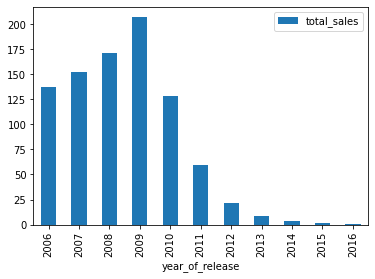

In [30]:
# Wii
games.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

На платформе Wii продажи начались в 2006 году, очень быстро достигли своего максимума в 2008-2009, после последовал спад, в 2015 году продажи практически прекратились, в настоящее время платформа не актуальна.

<AxesSubplot:xlabel='year_of_release'>

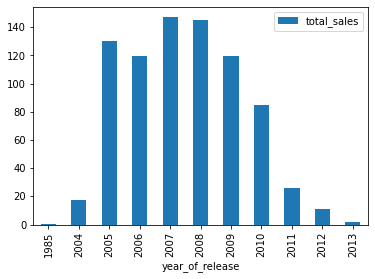

In [31]:
# DS
games.query('platform == "DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

На платформе DS продажи начались в 2004 году, очень быстро достигли своего максимума в 2005-2008, после последовал спад, в 2013 продажи практически прекратились, в настоящее время платформа не актуальна.

<AxesSubplot:xlabel='year_of_release'>

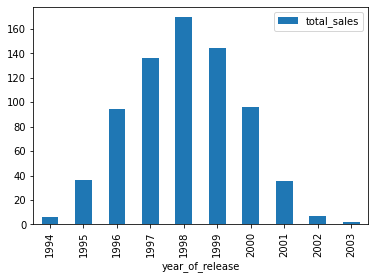

In [32]:
# PS
games.query('platform == "PS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

Платформа PS первая в линейке PlayStation, продажи начались в 1994 году, своего максимума достигли в 1998 году, после последовал спад, в 2003 продажи практически прекратились, в настоящее время платформа не актуальна.

**В среднем платфрмы остаются ктуальными в течении 7 лет, появляются же новые платформы ближе к моменту спада предидущей версии или старого поколения**

В целях формирования прогноза на 2017 года имеет смысл проводить анализ по последние 2-3 года и сохранением данных за 2016 год.

In [33]:
new_games = games.query('year_of_release >= 2014').copy()

**Какие платформы лидируют по продажам, растут или падают?**

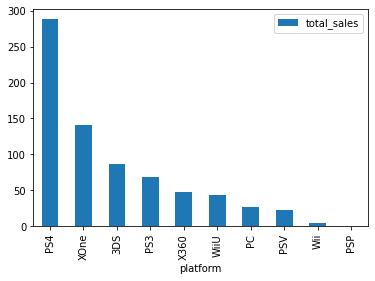

In [34]:
# график зависимости продаж от типа платформ за период с 2014 по 2016
platform_sales_new = new_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).plot(kind='bar')

За актуальный период лидерство звнимет PS4, и вдвое меньше у XOne

<AxesSubplot:xlabel='year_of_release'>

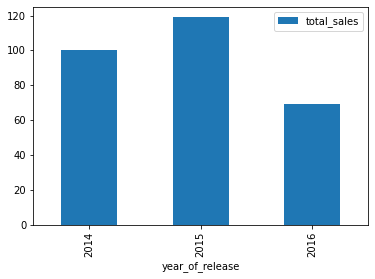

In [35]:
# продажи на платформе PS4, распределение по годам
new_games.query('platform == "PS4"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

Из за того что данные за 2016 год неполные, можно сказать, что по данной платформе продажи находятся на одном уровне, ее стабильно много покупают последние три года.

<AxesSubplot:xlabel='year_of_release'>

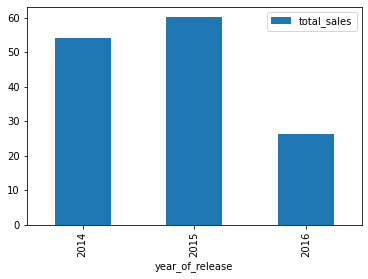

In [36]:
# продажи на платформе XOne, распределение по годам
new_games.query('platform == "XOne"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

Продажи находятся на одном уровне, ее стабильно покупают последние три года, но количество продаж в 2 раза меньше платформы PS4.

<AxesSubplot:xlabel='year_of_release'>

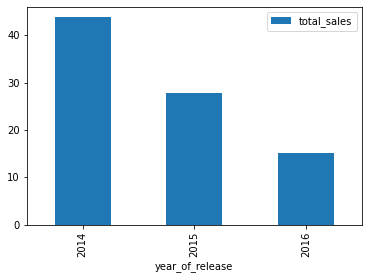

In [37]:
# продажи на платформе 3DS, распределение по годам
new_games.query('platform == "3DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

По данной платформе наблюдается незначительный спад продаж, около 30 процентов ежегодно.

<AxesSubplot:xlabel='year_of_release'>

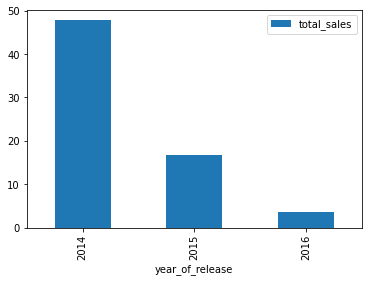

In [38]:
# продажи на платформе PS3, распределение по годам
new_games.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

Видно, что в 2015 году продажи резко упали относительно 2014 года, а в 2016 году продажи практически прекратились. На смену данной платформе PS3 пришла более современная PS4.

<AxesSubplot:xlabel='year_of_release'>

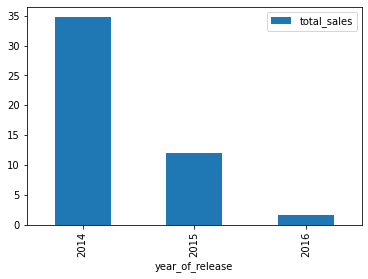

In [39]:
# продажи на платформе X360, распределение по годам
new_games.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

Аналогичная ситуация наблюдается у данной платфоры, в 2016 году ее уже никто не покупает.

<AxesSubplot:xlabel='year_of_release'>

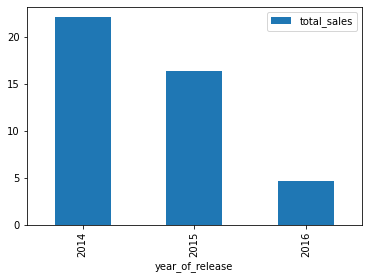

In [40]:
# продажи на платформе WiiU, распределение по годам
new_games.query('platform == "WiiU"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

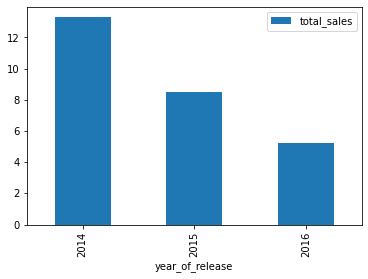

In [41]:
# продажи на платформе PC, распределение по годам
new_games.query('platform == "PC"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

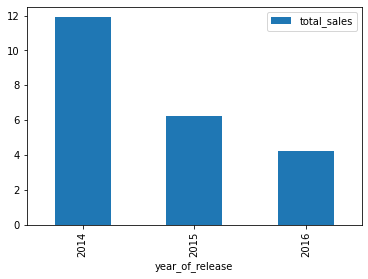

In [42]:
# продажи на платформе PSV, распределение по годам
new_games.query('platform == "PSV"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

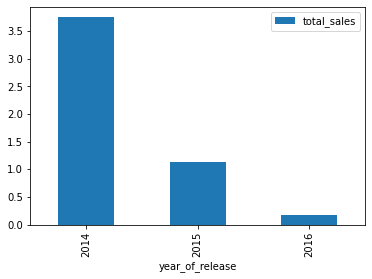

In [43]:
# продажи на платформе Wii, распределение по годам
new_games.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

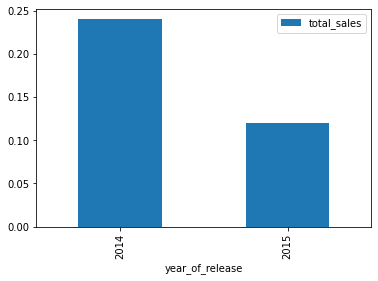

In [44]:
# продажи на платформе PSP, распределение по годам
new_games.query('platform == "PSP"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

У платформ WiiU, PC, PSV, Wii изначально в 2014 году были относительно небольшие продажи, которые постепенно снижаются в 2015 и продолжают снижаться.

**По результатам анализа количества продаж платформ за актуальный период, при дальнейшей обработке и анализе имеет смысл не учитывать платформы с минимальными продажами. Оставим платформы кроме PS3, X360, Wii, PSP.**

**График «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

In [45]:
import seaborn as sea

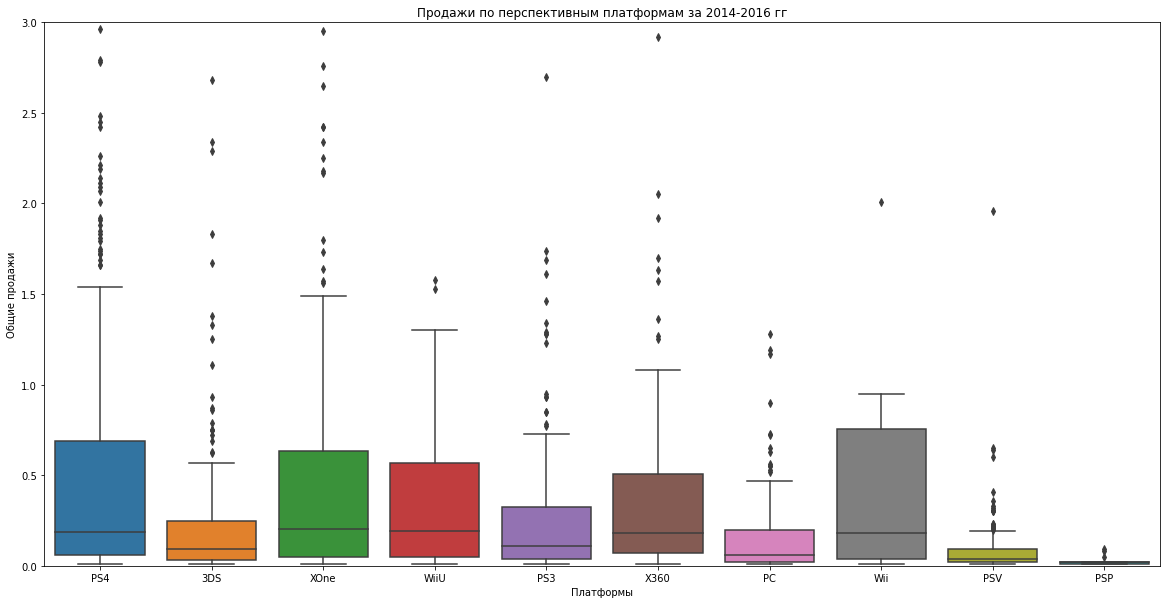

In [46]:
mustache = plt.figure(figsize = (20,10))
sea.boxplot(data = new_games, y = 'total_sales', x='platform').set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3))
plt.show()

In [47]:
new_games.pivot_table(index = 'platform', values = ['total_sales'],aggfunc = ['var', 'median', 'mean'])

,var,median,mean
,total_sales,total_sales,total_sales
platform,,,
3DS,1.412219,0.090,0.408868
PC,0.108477,0.060,0.179139
PS3,0.400764,0.110,0.311324
PS4,2.608124,0.185,0.766356
PSP,0.000769,0.020,0.027692
PSV,0.020048,0.040,0.075932
Wii,0.391189,0.180,0.460909
WiiU,1.349005,0.190,0.588767


**Вывод:**

Из графика видно, что по всем платформам существуют выбросы дальше третьих квартилей. У платформ PS4, WiiU и XOne одинаковы медианные значения продаж , также приблизительно равны среднее арифметическое значение продаж. Из данного анализа следует, что большей популярностью пользуются уже вышеуказанные платформы PS4, WiiU и XOne.

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.**

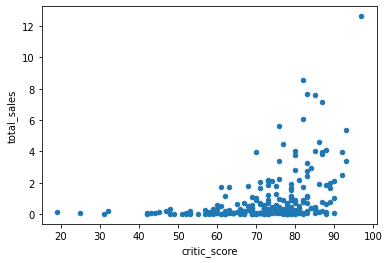

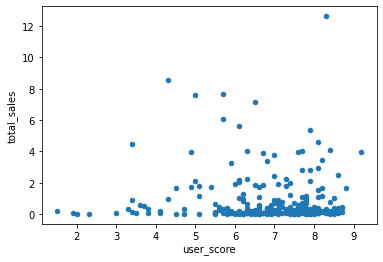

critic_score    0.401903
user_score     -0.043186
total_sales     1.000000
Name: total_sales, dtype: float64


In [48]:
# диаграмма рассеяния для платформы PS4, исключим поставленые ранее отрицательные значения
games_platform = new_games.query('platform == "PS4"')
games_platform[games_platform['critic_score'] != -100].plot(kind='scatter', x='critic_score', y='total_sales')
games_platform[games_platform['user_score'] != -100].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# коэффициент корреляции
print(games_platform[(games_platform['critic_score'] != -100) & (games_platform['user_score'] != -100)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

Оценки критиков для платформы PS4 имеет слабое влияние на продажи, оценка пользователей на продажи не влияет,

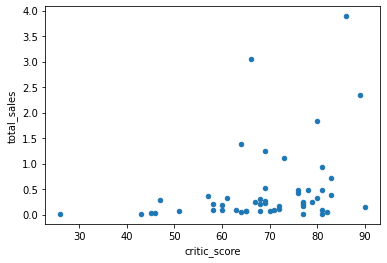

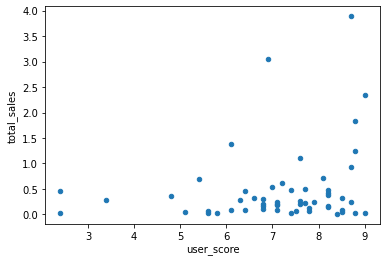

critic_score    0.284686
user_score      0.279850
total_sales     1.000000
Name: total_sales, dtype: float64


In [49]:
# аналогично для платформы 3DS
games_platform = new_games.query('platform == "3DS"')
games_platform[games_platform['critic_score'] != -100].plot(kind='scatter', x='critic_score', y='total_sales')
games_platform[games_platform['user_score'] != -100].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# коэффициент корреляции
print(games_platform[(games_platform['critic_score'] != -100) & (games_platform['user_score'] != -100)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

Оценки критиков для платформы 3DS имеет слабое влияние на продажи, оценка пользователей также имеет очень слабое влияние.

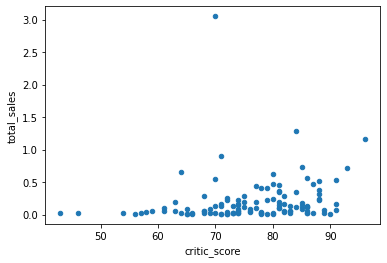

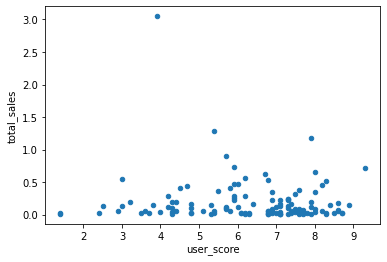

critic_score    0.172061
user_score     -0.089974
total_sales     1.000000
Name: total_sales, dtype: float64


In [50]:
# аналогично для платформы PC
games_platform = new_games.query('platform == "PC"')
games_platform[games_platform['critic_score'] != -100].plot(kind='scatter', x='critic_score', y='total_sales')
games_platform[games_platform['user_score'] != -100].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# коэффициент корреляции
print(games_platform[(games_platform['critic_score'] != -100) & (games_platform['user_score'] != -100)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])


Оценки критиков для платформы PC не имеет влияние на продажи, оценка пользователей на продажи не влияет.

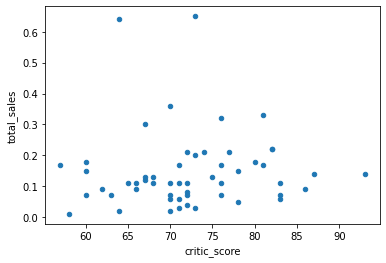

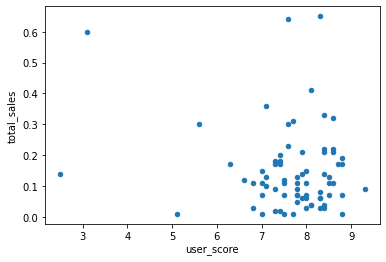

critic_score    0.041029
user_score      0.023528
total_sales     1.000000
Name: total_sales, dtype: float64


In [51]:
# диаграмма рассеяния для платформы PSV
games_platform = new_games.query('platform == "PSV"')
games_platform[games_platform['critic_score'] != -100].plot(kind='scatter', x='critic_score', y='total_sales')
games_platform[games_platform['user_score'] != -100].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# коэффициент корреляции
print(games_platform[(games_platform['critic_score'] != -100) & (games_platform['user_score'] != -100)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])


Оценки критиков для платформы PSV имеет слабое влияние на продажи, оценка пользователей также имеет очень слабое влияние.

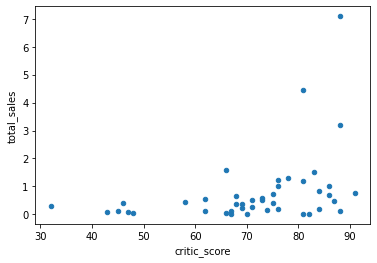

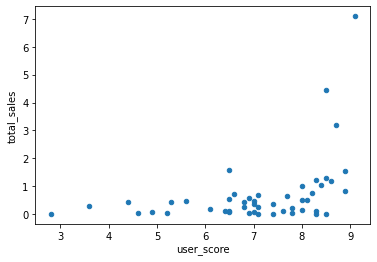

critic_score    0.375640
user_score      0.411451
total_sales     1.000000
Name: total_sales, dtype: float64


In [52]:
# диаграмма рассеяния для платформы WiiU
games_platform = new_games.query('platform == "WiiU"')
games_platform[games_platform['critic_score'] != -100].plot(kind='scatter', x='critic_score', y='total_sales')
games_platform[games_platform['user_score'] != -100].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# коэффициент корреляции
print(games_platform[(games_platform['critic_score'] != -100) & (games_platform['user_score'] != -100)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])


Оценка критиков для платформы WiiU имеет слабое влияние на продажи, оценка пользователей также имеет слабое влияние.

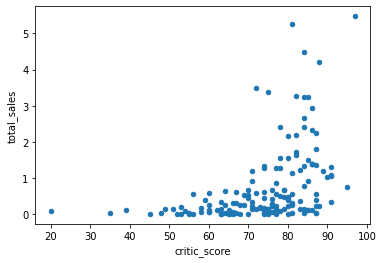

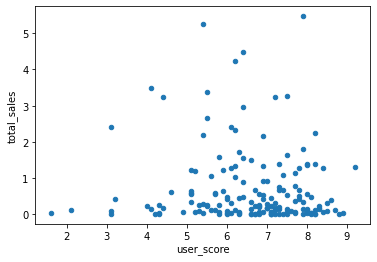

critic_score    0.422112
user_score     -0.091734
total_sales     1.000000
Name: total_sales, dtype: float64


In [53]:
# диаграмма рассеяния для платформы XOne
games_platform = new_games.query('platform == "XOne"')
games_platform[games_platform['critic_score'] != -100].plot(kind='scatter', x='critic_score', y='total_sales')
games_platform[games_platform['user_score'] != -100].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# коэффициент корреляции
print(games_platform[(games_platform['critic_score'] != -100) & (games_platform['user_score'] != -100)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])


Оценка критиков для платформы XOne имеет слабое влияние на продажи, оценка пользователей на продажи не влияет

**Вывод:**

Из построенных выше диаграмм рассеяния и коэффициента корреляции по каждой платформе между отзывами и продажами видно, что оценки критиков для всех платформ практически не влияют или имеют очень слабое влияние на продажи. Оценки пользователей имеют очень слабое влияние на продажи и не влияют совсем.

**Общее распределение игр по жанрам.** 

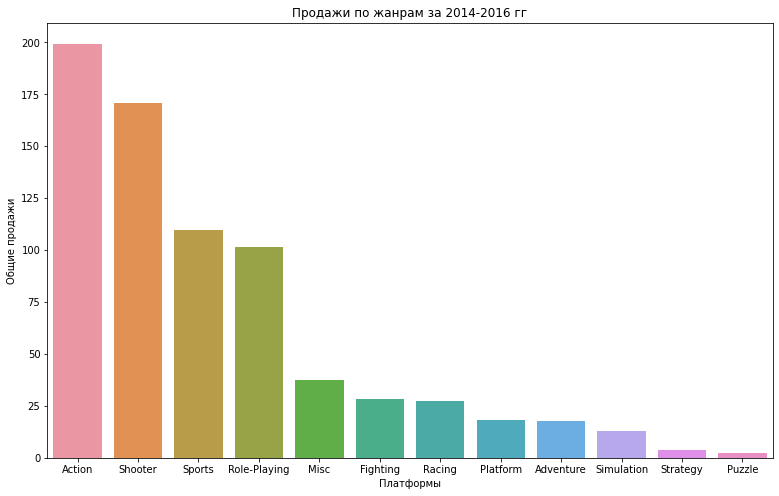

In [54]:
# график распределения продаж по жанрам игр
plt.figure(figsize=(13, 8))
new_platform_sales = new_games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
(sea.barplot(data = new_platform_sales, x = new_platform_sales.index, y = 'total_sales')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

In [55]:
new_games_mean = new_games.groupby('genre')['total_sales'].median().sort_values(ascending=False)

<AxesSubplot:xlabel='genre'>

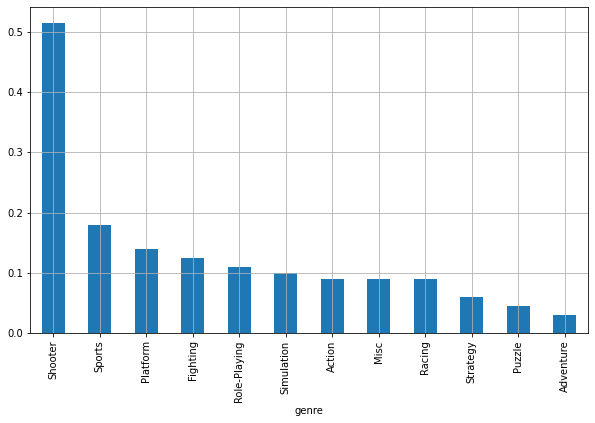

In [56]:
new_games_mean.plot(y='genre',grid=True,figsize=(10,6),kind='bar')

**Вывод:**
Долгое время жанр Action лидировал, ноднако годом ранее первенство занял жанр Shooter. До 2011 года люди любили поиграть в музыкальные игры, там где надо двигаться в ритм музыке и аналогичные, но потом интерес к этой категории игр угас. Со спортивными играми аналогичная ситуация. Шутеры же в свою очередь неизменно пользуются интересом у пользователей. Интерес к остальным категориям игор с годами только уменьшается.

### Шаг 4. Составьте портрет пользователя каждого региона:
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [57]:
# самые популярные платформы
na_plat = new_games.groupby('platform')['na_sales'].sum()
eu_plat = new_games.groupby('platform')['eu_sales'].sum()
jp_plat = new_games.groupby('platform')['jp_sales'].sum()

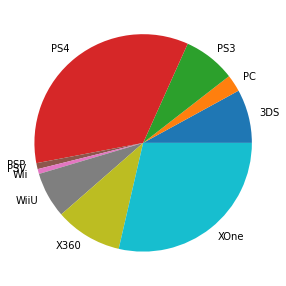

In [58]:
full_na = new_games['na_sales'].sum()
share_na = na_plat/full_na

labels = ["3DS", "PC", "PS3", "PS4", "PSP", "PSV", "Wii", "WiiU", "X360", "XOne"]
fig = plt.figure(figsize =(10, 5))
plt.pie(share_na, labels=labels)
plt.show()

/tmp/ipykernel_133/4015229717.py:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(share_eu, labels=labels)


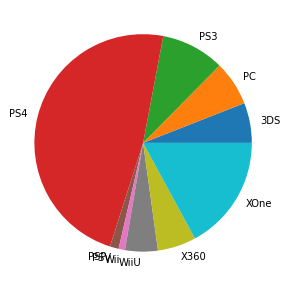

In [59]:
full_eu = new_games['eu_sales'].sum()
share_eu = eu_plat/full_eu

labels = ["3DS", "PC", "PS3", "PS4", "PSP", "PSV", "Wii", "WiiU", "X360", "XOne"]
fig = plt.figure(figsize =(10, 5))
plt.pie(share_eu, labels=labels)
plt.show()

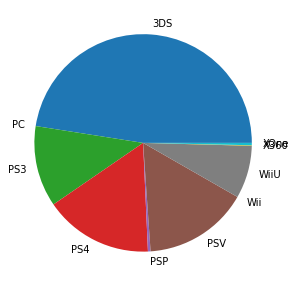

In [60]:
full_jp = new_games['jp_sales'].sum()
share_jp = jp_plat/full_jp

labels = ["3DS", "PC", "PS3", "PS4", "PSP", "PSV", "Wii", "WiiU", "X360", "XOne"]
fig = plt.figure(figsize =(10, 5))
plt.pie(share_jp, labels=labels)
plt.show()

**Вывод:**

В списке 5 самых популярных платформ Северной Америки показатель похожи на другие страны. Стоит отметить, больше всего продаж у PS4. Также тут самый большой показать продаж для платформы XOne.
Так же как и в большинстве других стран рейтин по платформам возглавляет Shooter и Platform.

В целом ситуация похожа на общую картину по миру.В европейском регионе так же лидирует PS4. Однако 3 место тут заняла PS3, а так же появилась PC.
В списке топа жанров в Европе на 3 месте появился Racing. Shooter лидирует с большим отрывом.

В регионе JP видим существуенные отличия от мировых предпочтений. Здесь лидируют платформы 3DS, PS4, PSV, PS3, WiiU. Выдающийся лидер других регионов - PS4, здесь располагается на втором месте.
Стоит отметить лидерующие жанры - Role-Playing и Fighting.

В целом для других стран и по жанрам и по платформам ситуация схожа с мировой.

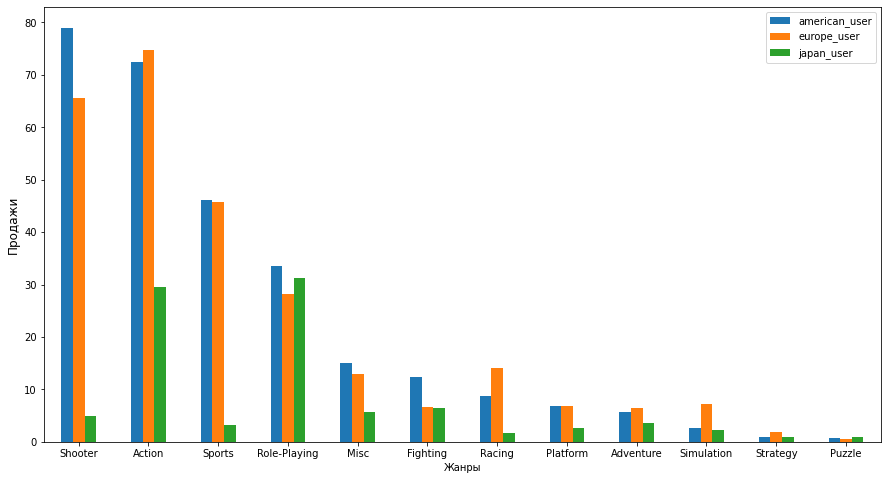

In [61]:
# самые популярные платформы
# сумма проданных копий для Северной Америки по жанрам
na_genre = new_games.groupby(['genre'])['na_sales'].agg(['sum'])
# сумма проданных копий для Европы по жанрам
eu_genre = new_games.groupby(['genre'])['eu_sales'].agg(['sum'])
# сумма проданных копий для Японии по жанрам
jp_genre = new_games.groupby(['genre'])['jp_sales'].agg(['sum'])
# объединяем
users_genre = pd.concat([na_genre, eu_genre, jp_genre], axis=1).reset_index()
users_genre.columns = ['genre', 'american_user', 'europe_user', 'japan_user']
users_genre = users_genre.sort_values(by='american_user', ascending=False)
users_genre.plot.bar(x="genre", rot=0, figsize =(15, 8))
plt.xlabel('Жанры', fontsize=10)
plt.ylabel('Продажи',fontsize=12)
plt.show()

**Вывод:**

У Американских пользователей самыми популярными жанрами являются Shooter и Action, жанры Sports и Role-Playing достаточно близки по продажам, самыми не популярными жанрами в Америке являются Strategy и Puzzle.

У Европейских пользователей самыми популярными жанрами также являются Shooter и Action, жанры Sports и Role-Playing достаточно близки по продажам, самыми не популярными жанрами в Европе также являются Strategy и Puzzle.

У Японских пользователей самыми популярными жанрами с подавляющим преимуществом являются Role-Playing и Action, затем следуют несолько жанров Fighting, Misc, Shooter, самыми не популярными жанрами в Японии являются Strategy и Puzzle.

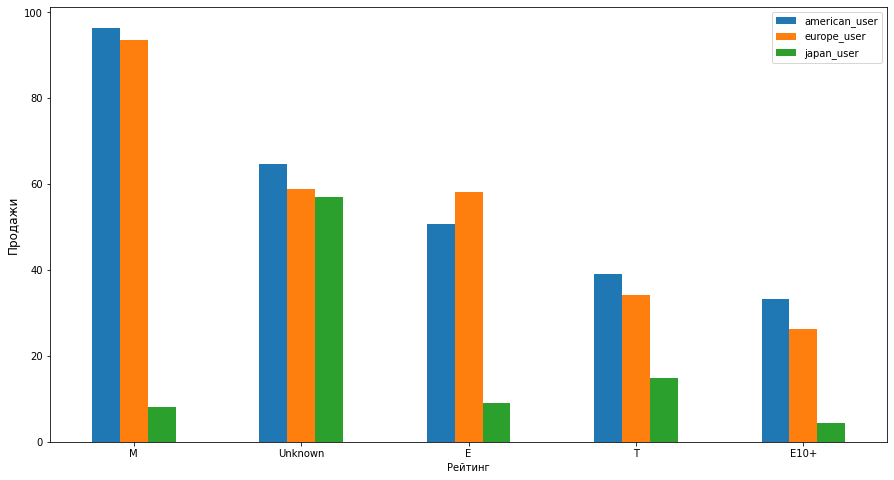

In [62]:
# влияние рейтинга ESRB на продажи в отдельных регионах
# сумма проданных копий для Северной Америки по рейтингу
na_rating = new_games.groupby(['rating'])['na_sales'].agg(['sum'])
# сумма проданных копий для Европы по рейтингу
eu_rating = new_games.groupby(['rating'])['eu_sales'].agg(['sum'])
# сумма проданных копий для Японии по рейтингу
jp_rating = new_games.groupby(['rating'])['jp_sales'].agg(['sum'])
# объединяем
users_rating = pd.concat([na_rating, eu_rating, jp_rating], axis=1).reset_index()
users_rating.columns = ['rating', 'american_user', 'europe_user', 'japan_user']
users_rating = users_rating.sort_values(by='american_user', ascending=False)
users_rating.plot.bar(x="rating", rot=0, figsize =(15, 8))
plt.xlabel('Рейтинг', fontsize=10)
plt.ylabel('Продажи',fontsize=12)
plt.show()

**Вывод:**

У Американских пользователей и Европейских пользователей самые популярные игры с рейтингом М, следом идут игры с неопределенным рейтингом Unknown, далее соответственно с рейтингом Е, Т и Е10+. Можно сказать, что в Америке и Европе пользователи отдают предпочтение одинаковым играм с одним и тем же рейтингом.
У Японских пользователей кардинально иная картина влияния рейтингов игр на продажи. Самыми популярными являются игры с рейтингом Unknown, т.к. в Японии рейтинг выставляет организация **Computer Entertainment Rating Organization**, видимо из за этого в исходном датасете были пропуски. 

**Общий вывод:**

В данном пункте проведены исследования для определения портрета пользователя каждого региона. Можно отметить, что предпочтения пользователей Америки и Европы во многом схожи, самыми популярными платформами являются PS4 и XOne, любимые жанры - Shooter и Action, игры с рейтингом М и Unknown. В связи с многочисленностью пользователей в данных регионах бизнесу повышенное внимание в первую очередь стоит обратить на указанные платформы и жанры игр.

### Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [63]:
# делаем аналогично предыдущему проекту
# уберем отрицательные значения
new_games[new_games['user_score'] != -100]
results = st.ttest_ind(new_games.query('platform == "XOne"')['user_score'], new_games.query('platform == "PC"')['user_score'])

alpha = .02
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06835889483343399
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Нету оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются. Принимаем нулевую гипотезу, p-значение больше значения alpha, что дает основание принять предположение об отсутствии различий между средними пользовательскими рейтингами платформ Xbox One и PC

**Средние пользовательские рейтинги жанров Action и Sports разные**

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [64]:
new_games[new_games['user_score'] != -100]
results = st.ttest_ind(new_games.query('genre == "Action"')['user_score'], new_games.query('genre == "Sports"')['user_score'])

alpha = .02

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.21006597336919e-12
Отвергаем нулевую гипотезу


**Вывод:**

Принимаем альтернативную гипотезу, p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между cредними пользовательскими рейтингами жанров Action и Sports.

### Шаг 6. Напишите общий вывод
Оформление: 
Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

**Общий вывод**

Проведен обзор данных и выполнена предобработка данных, выявлены недостатки в данных, были обработаны пропуски, в некоторых случаях строки были удалены за ненадобностью, в некоторых пропуски были заменены на отриц значение (-100), также были расчитаны суммарные продажи по регионам и записаны в отдельный столбец 'total_sales'.

Проведен исследовательский анализ данных:
- Построен график количества игр выпускавшихся в разные годы.
- Построен график как менялись продажи по платформам. Указаны платформы с наибольшими продажами и распределение по годам.
- По итогам анализа данных, выбран соответствующий актуальный период.
- Построен график зависимости продаж от типа платформ за актуальный период.
- Построен график «ящик с усами» по продажам игр в разбивке по платформам.
- Проведен анализ влияния на продажи отзывов пользователей и критиков. Построена диаграмма рассеяния и расчитан коэффициент корреляции между отзывами и продажами

Начиная с 2000 года начался рост количества игр, с 2002 по 2004 небольшой "застой", а затем резкий скачок до 2008-2009г, где наблюдался пик количества игр, затем наступил спад вплоть до 2016г.
Платформы с наибольшими суммарными продажами, PS2, X360, PS3, Wii, DS, PS. Данные 6 платформ выделяются от всех остальных наибольшими суммарными продажами.
В целях формирования прогноза на 2017 года имеет смысл проводить анализ по последние 2-3 года c сохранением данных за 2016г. Выбран соответствующий актуальный период 2014-2016гг.
По результатам анализа количества продаж за актуальный период, при дальнейшей обработке и анализе имеет смысл не учитывать платформы с минимальными продажами. Минимальные продажи у платформ PS3, X360, Wii, PSP.
Из анализа графика «ящик с усами» следует, что большей популярностью пользуются платформы PS4, WiiU и XOne. У платформ PS4, WiiU и XOne одинаковы медианные значения продаж (0.185, 0.190, 0.205 соответственно), также приблизительно равны среднее арифметическое значение продаж (0.766356, 0.588767, 0.615614 соответственно).
Из построенных диаграмм рассеяния и расчета коэффициента корреляции по каждой платформе между отзывами и продажами видно, что оценки критиков для всех платформ практически не влияют или имеют очень слабое влияние на продажи. Оценки пользователей также имеют очень слабое влияние на продажи и не влияют совсем.
Составлен портрет пользователя каждого региона
Определены для пользователя каждого региона (NA, EU, JP) самые популярные платформы, жанры, а также влияние рейтинга ESRB на продажи в регионах.
Вывод: Предпочтения пользователей Америки и Европы во многом схожи, самыми популярными платформами являются PS4 и XOne, любимые жанры - Shooter и Action, игры с рейтингом М и Unknown. В связи с многочисленностью пользователей в данных регионах бизнесу повышенное внимание в первую очередь стоит обратить на указанные платформы и жанры игр. Предпочтения пользователей из Японии существенно отличаются, самой популярной платформой являются 3DS, любимые жанры - Role-Playing и Action и игры с рейтингом Unknown.

Проведена проверка двух гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
-Средние пользовательские рейтинги жанров Action и Sports разные.

Результаты проверки гипотез:
- Первая гипотеза: Принимаем нулевую гипотезу.
- Вторая гипотеза: Принимаем альтернативную гипотезу.